In [5]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

import pandas as pd
from src import data_pipeline, volatility_models, features

vix_data = data_pipeline.prepare_series()
df = data_pipeline.engineer_features(vix_data.frame)
df.tail()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,vix,vix_w,log_vix,dlog_vix,abs_dlog_vix,month,year,quarter
date,,,,,,,,
2025-11-18,24.690001,24.690001,3.206398,0.098231,0.098231,11,2025,4
2025-11-19,23.660000,23.660000,3.163786,-0.042612,0.042612,11,2025,4
2025-11-20,26.420000,26.420000,3.274121,0.110335,0.110335,11,2025,4
2025-11-21,23.430000,23.430000,3.154017,-0.120104,0.120104,11,2025,4
2025-11-24,22.629999,22.629999,3.119276,-0.034741,0.034741,11,2025,4


In [6]:
returns = df['dlog_vix'].dropna()
garch_norm = volatility_models.fit_garch(returns, distribution='normal')
garch_t = volatility_models.fit_garch(returns, distribution='t')
egarch_norm = volatility_models.fit_egarch(returns, distribution='normal')
egarch_t = volatility_models.fit_egarch(returns, distribution='t')

summary = volatility_models.summarize_fits(garch_norm, garch_t, egarch_norm, egarch_t)
summary

,model,distribution,aic,bic,persistence,half_life_days,lb_pvalue,lb_sq_pvalue
0,GARCH,normal,28112.306765,28143.953849,0.801369,3.130271,NaN,NaN
1,GARCH,t,27483.164419,27521.140920,0.884513,5.648311,NaN,NaN
2,EGARCH,normal,27820.336949,27858.313450,0.920146,8.328844,NaN,NaN
3,EGARCH,t,27341.473313,27385.779231,0.938010,10.831361,NaN,NaN


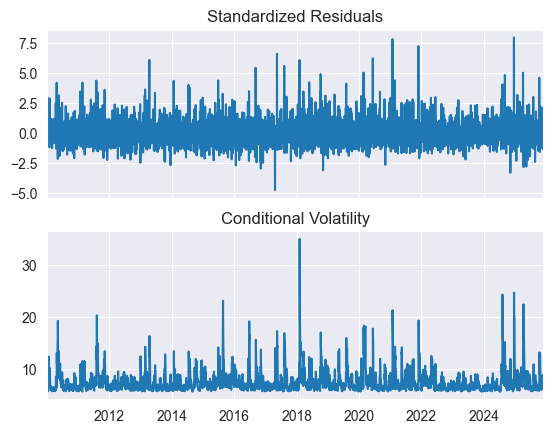

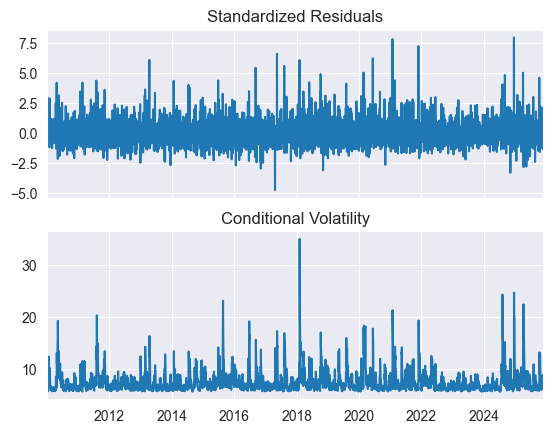

In [7]:
garch_norm['result'].plot()

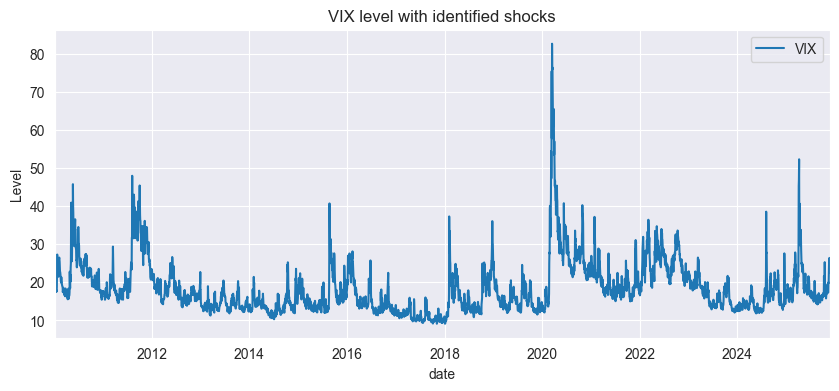

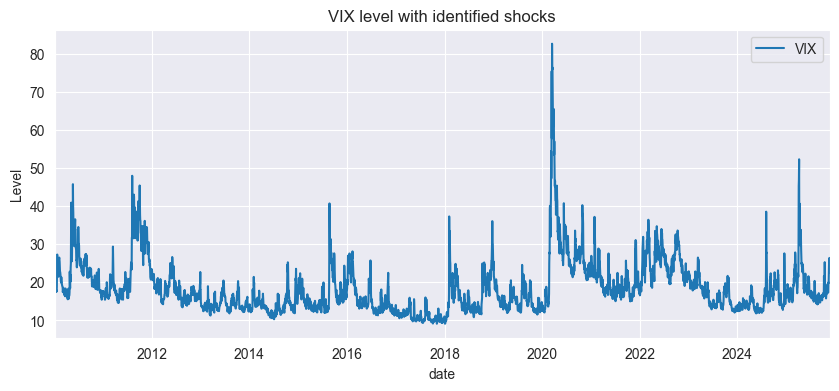

In [8]:
from src import visualization
fig = visualization.plot_vix_series(df, shock_indicator=None)
fig